<a href="https://colab.research.google.com/drive/1tAgbjrtiVSNS4MmNjzobwZF5Vd1EWMwy?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework


The homework is to prepare a report for the Ministry of Transport, revealing the nature and characteristics of flight delays. The report should help identify problem areas and contribute to decision-making. Therefore, strive not to state general facts, but to show problems. For example, the fact "the average departure delay is 15 minutes" by itself says little and does not help to understand why this is happening. On the contrary, a graph showing that on Mondays delays increase threefold compared to other days against the background of an increase in the number of flights and passengers suggests a possible cause of the problem: airports cannot cope with uneven load.

The report should be in the form of a notebook with a clear structure. At the beginning of the Markdown cell there is a brief description of the question under study (what we will study), then the code and all its outputs (tables, graphs, values), then again in the Markdown cell in which your brief conclusion is formulated.

The report should contain at least **5 results** confirmed by graphs. For variety of material, use different types of diagrams. All graphs should be provided with the necessary signatures (axis designations, title, color scheme legend).

To solve the problems, use the methods of the `pandas` library.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#загрузка данных
flights = pd.read_csv("flights.csv")
print("flights:\n", flights.head())
airlines = pd.read_csv("airlines.csv")
print("airlines:\n", airlines.head())
airports = pd.read_csv("airports.csv")
print("airports:\n", airports.head())

#объединение данных
#добавление к таблице flights колонки с полным названием авиалиний
flights = flights.merge(airlines, left_on="AIRLINE", right_on="IATA_CODE", how="left").drop(columns=["IATA_CODE"])
#добавление к таблице flights колонки с полным названием аэрапорта отправления
flights = flights.merge(airports, left_on="ORIGIN_AIRPORT", right_on="IATA_CODE", how="left").drop(columns=["IATA_CODE"])

print("Flights Data:")
print(flights.head())

#основная информация о датасете
print("\nFlights Data Info:")
print(flights.info())
print("\nMissing Values:")
print(flights.isnull().sum())

print(len(flights))

<ipython-input-2-9dd14d30f637>:6: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  flights = pd.read_csv("flights.csv")


flights:
    YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0  2015      1    1            4      AS             98      N407AS   
1  2015      1    1            4      AA           2336      N3KUAA   
2  2015      1    1            4      US            840      N171US   
3  2015      1    1            4      AA            258      N3HYAA   
4  2015      1    1            4      AS            135      N527AS   

  ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  ARRIVAL_TIME  \
0            ANC                 SEA                    5  ...         408.0   
1            LAX                 PBI                   10  ...         741.0   
2            SFO                 CLT                   20  ...         811.0   
3            LAX                 MIA                   20  ...         756.0   
4            SEA                 ANC                   25  ...         259.0   

   ARRIVAL_DELAY  DIVERTED  CANCELLED  CANCELLATION_REASON  AIR_SYSTEM_DELAY  \
0 

<Figure size 1000x500 with 0 Axes>

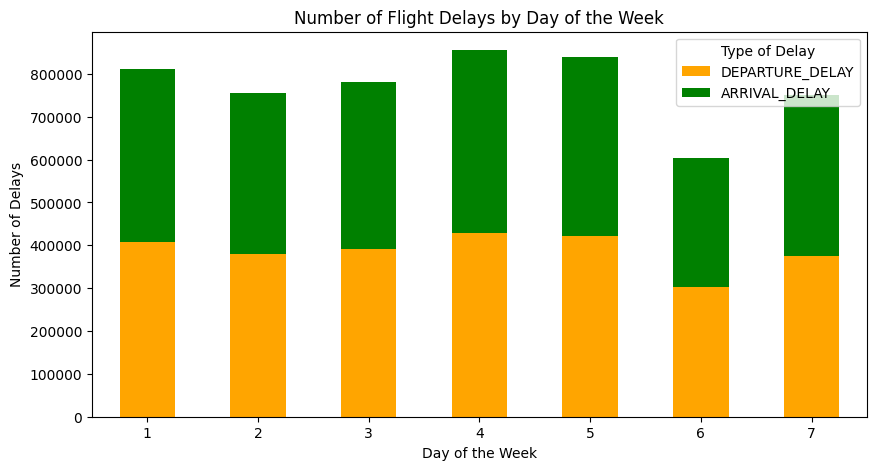

In [3]:
#анализ задержек по дням недели
#берем рейсы с задержками, группируем их по дням недели и считаем количество для каждого дня
delay_conditions = (flights["DEPARTURE_DELAY"] > 0) | (flights["ARRIVAL_DELAY"] > 0)
weekly_delays = flights[delay_conditions].groupby("DAY_OF_WEEK")[["DEPARTURE_DELAY", "ARRIVAL_DELAY"]].count()

plt.figure(figsize=(10, 5))
weekly_delays.plot(kind="bar", stacked=True, figsize=(10, 5), color=["orange", "green"])
plt.title("Number of Flight Delays by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Delays")
plt.legend(title="Type of Delay")
plt.xticks(rotation=0)
plt.show()

#из графика видно, что в основном количество задержек растпредлено равномерно,
#но в будние дни их обычно больше, чем в выходные + их кол-во увеличивается под конец рабочей недели

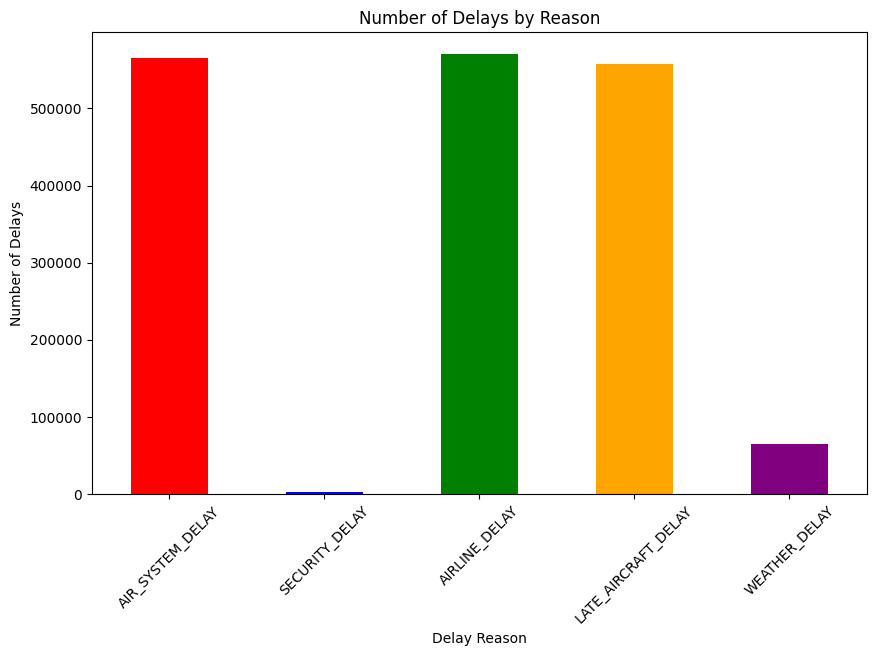

In [4]:
#анализ задержек по причинам
#выделяем причины задержек, считаем их количество
delay_reasons = ["AIR_SYSTEM_DELAY", "SECURITY_DELAY", "AIRLINE_DELAY", "LATE_AIRCRAFT_DELAY", "WEATHER_DELAY"]
delay_counts_by_reason = (flights[delay_reasons] > 0).sum()

plt.figure(figsize=(10, 6))
delay_counts_by_reason.plot(kind="bar", color=["red", "blue", "green", "orange", "purple"])
plt.title("Number of Delays by Reason")
plt.xlabel("Delay Reason")
plt.ylabel("Number of Delays")
plt.xticks(rotation=45)
plt.show()
#основные причины задержек - это задежки из-за системы, авиакомпаний и опаздывание самолета
#задержки из-за безопасности и погоды намного меньше

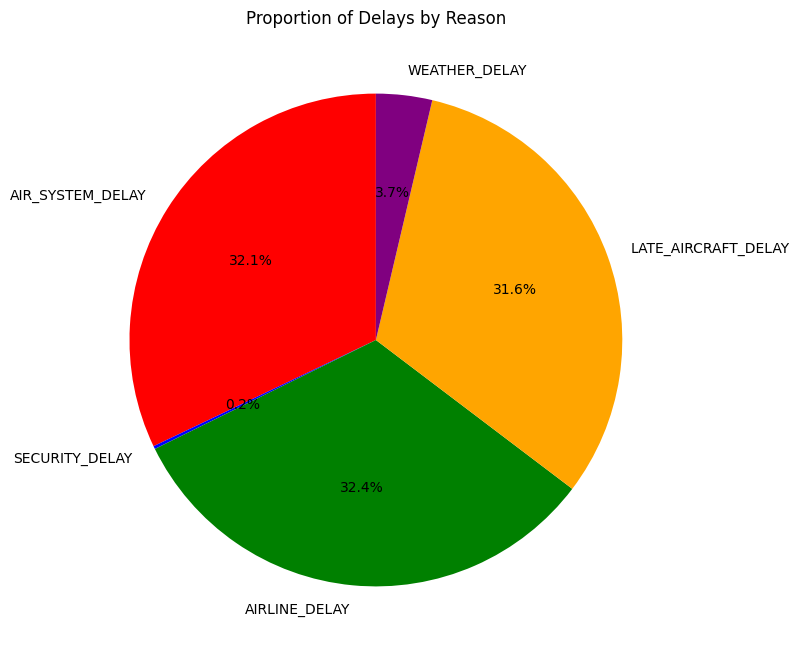

In [5]:
#изображение графика в виде piechart
delay_reasons = ["AIR_SYSTEM_DELAY", "SECURITY_DELAY", "AIRLINE_DELAY", "LATE_AIRCRAFT_DELAY", "WEATHER_DELAY"]
delay_counts_by_reason = (flights[delay_reasons] > 0).sum()

plt.figure(figsize=(8, 8))
plt.pie(
    delay_counts_by_reason,
    labels=delay_counts_by_reason.index,
    autopct="%1.1f%%",
    colors=["red", "blue", "green", "orange", "purple"],
    startangle=90,
)

plt.title("Proportion of Delays by Reason")
plt.show()


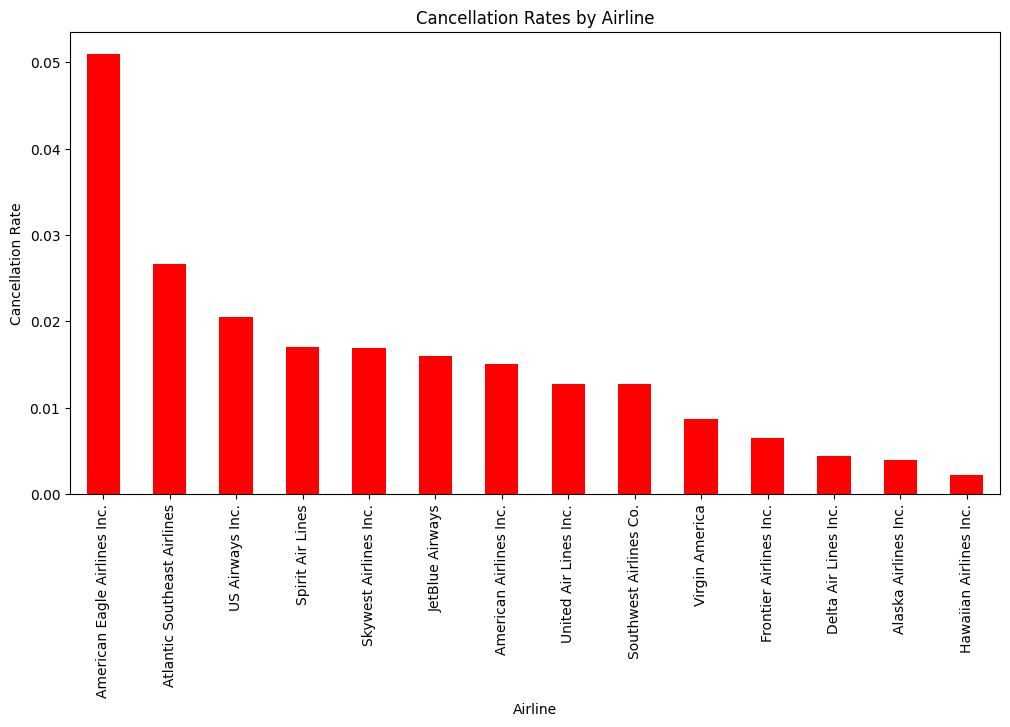

In [6]:
# анализ доли отмененных рейсов по авиакомпаниям
cancellation_rates = flights.groupby("AIRLINE_y")["CANCELLED"].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
cancellation_rates.plot(kind="bar", color="red")
plt.title("Cancellation Rates by Airline")
plt.xlabel("Airline")
plt.ylabel("Cancellation Rate")
plt.xticks(rotation=90)
plt.show()
#получаем список авиакомпаний, которые менее надежды. На них следует обратить особое внимание. American Eagle Airlines явно отличается на фоне остальных

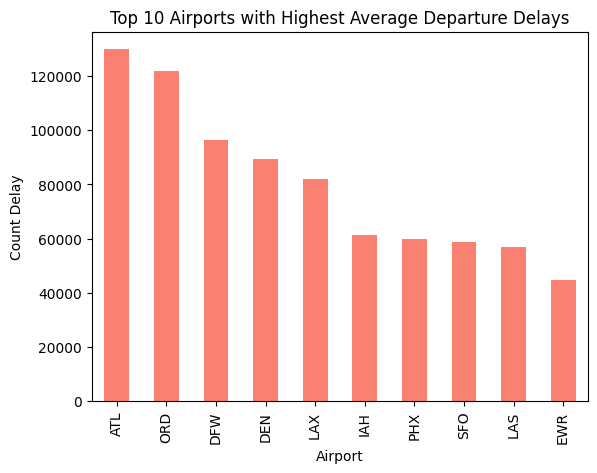

In [7]:
#aнализ задержек по аэропортам
#считаем количество задержек для аэропортов, которые были отправными для задержек связанных с отправлением
airport_delays = flights[flights["DEPARTURE_DELAY"] > 0].groupby("ORIGIN_AIRPORT").size().sort_values(ascending=False).head(10)
airport_delays.plot(kind="bar", color="salmon")
plt.title("Top 10 Airports with Highest Average Departure Delays")
plt.xlabel("Airport")
plt.ylabel("Count Delay")
plt.show()
#получаем список аэропортов с максимальной загруженностью.

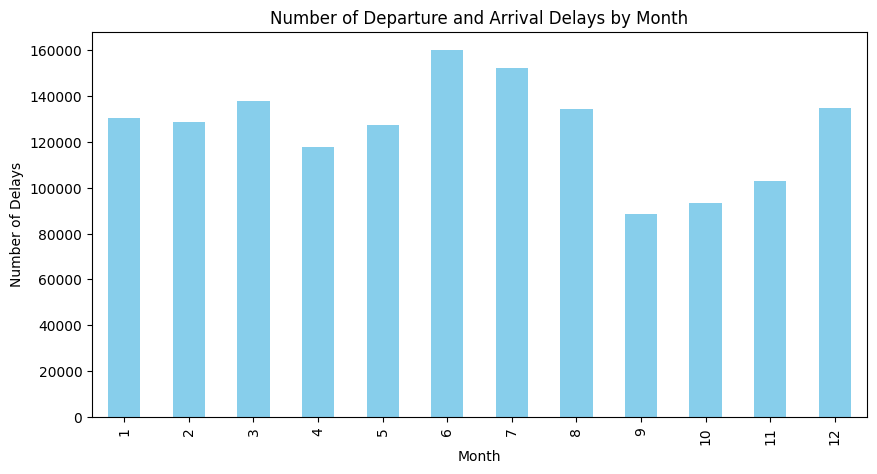

In [8]:
#анализируем задежки по месяцам
monthly_delays = flights[(flights["DEPARTURE_DELAY"] > 0) & (flights["ARRIVAL_DELAY"] > 0)].groupby("MONTH").size()
plt.figure(figsize=(10, 5))
monthly_delays.plot(kind="bar", color="skyblue")
plt.title("Number of Departure and Arrival Delays by Month")
plt.xlabel("Month")
plt.ylabel("Number of Delays")
plt.show()
#видно, что задержки имеют сезонность. Например, в летние месяцы их намного больше, чем осенью

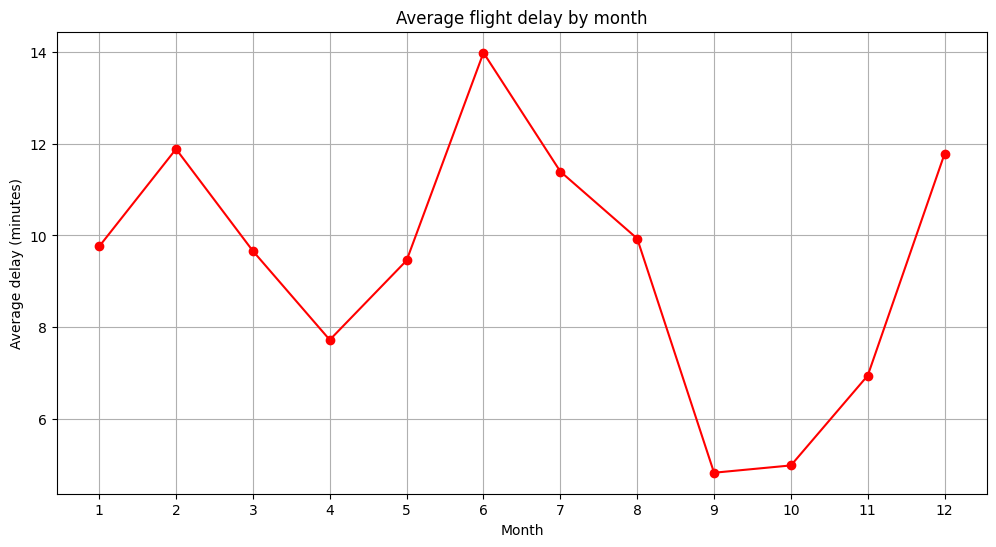

In [10]:
delays_by_month = flights.groupby('MONTH')['DEPARTURE_DELAY'].mean()

# Построение графика
plt.figure(figsize=(12, 6))
delays_by_month.plot(kind='line', marker='o', color='red')
plt.title('Average flight delay by month')
plt.xlabel('Month')
plt.ylabel('Average delay (minutes)')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()